### Título: Proyecto final de asignatura (4: Preprocesamiento específico para Clustering)
### Autores: Grupo 2 
### Asignatura: Aprendizaje Automático

### Importamos las bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import sklearn as sk
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from IPython.display import display

### Importamos el csv

In [2]:
CSV = "DF1.0_proy_escuela_eda_general.csv"

df = pd.read_csv(CSV)

### Tamaño CSV

In [3]:
# Dimensiones del dataset
dimensiones = df.shape
print(f"Dimensiones del dataset: {dimensiones[0]} filas y {dimensiones[1]} columnas")

Dimensiones del dataset: 548 filas y 37 columnas


### Mostramos el gráfico de correlaciones

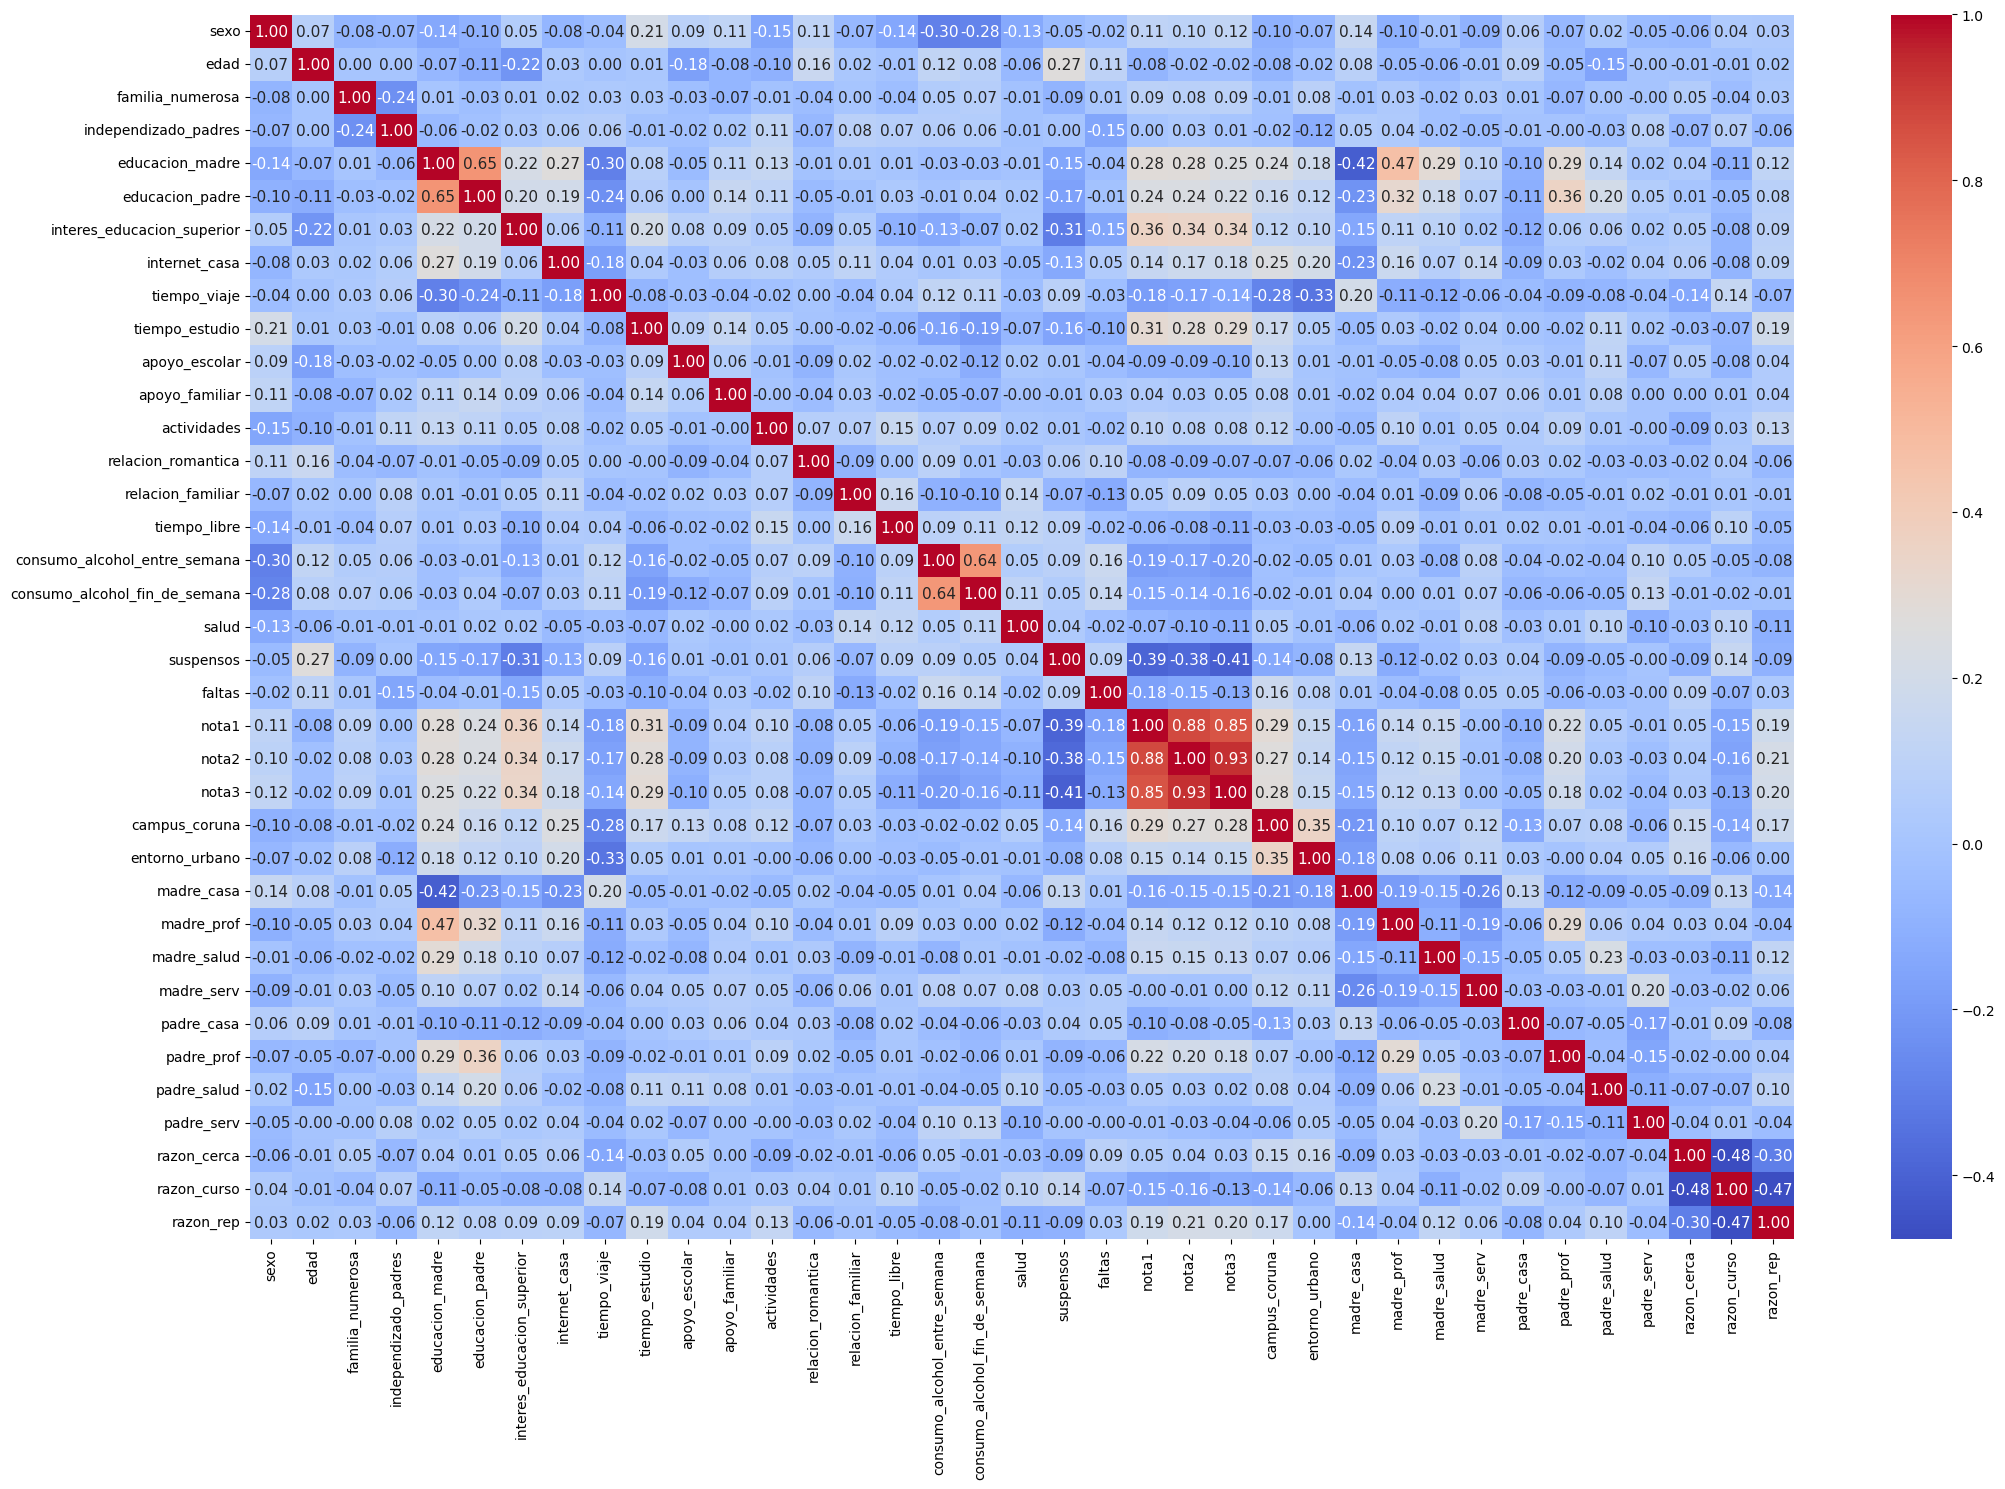

In [4]:
# Hacemos otro gráfico de correlación con los datos estandarizados
corr_matrix = df.corr()

# Ajustar el tamaño de la figura antes de dibujar el mapa de calor
plt.figure(figsize=(22, 15))

# Dibujar el mapa de calor
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",  # Formato de los números
    annot_kws={"size": 11}  # Tamaño de la fuente de los números
)

# Ajustar automáticamente los márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

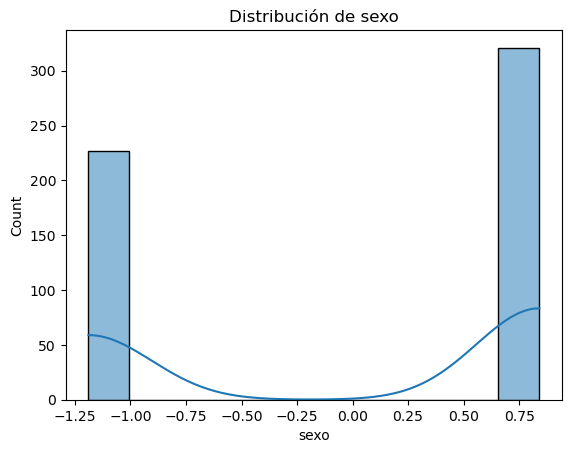

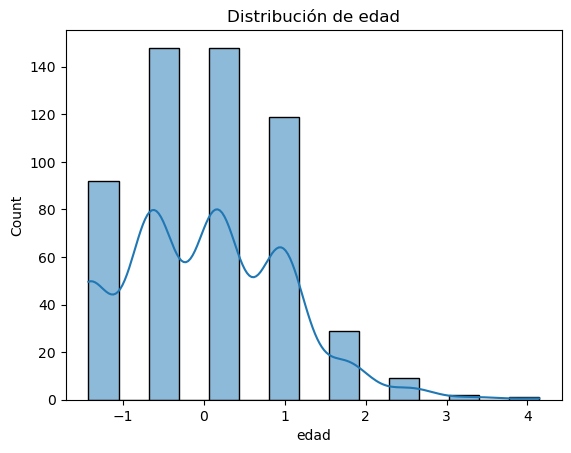

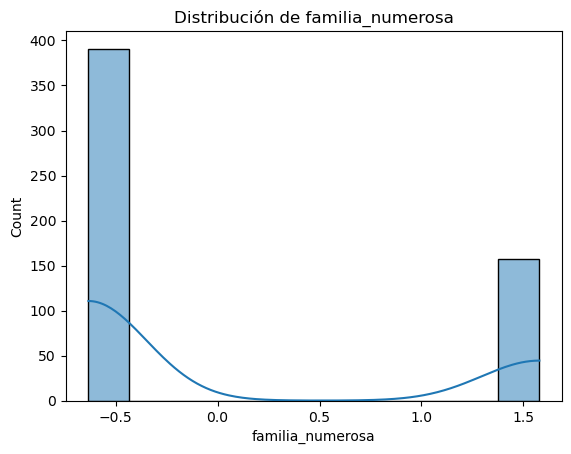

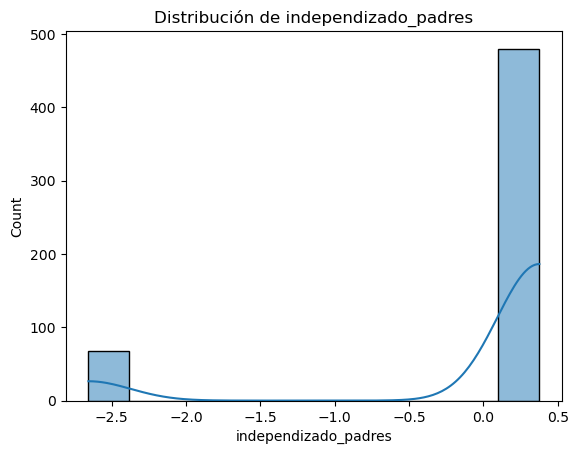

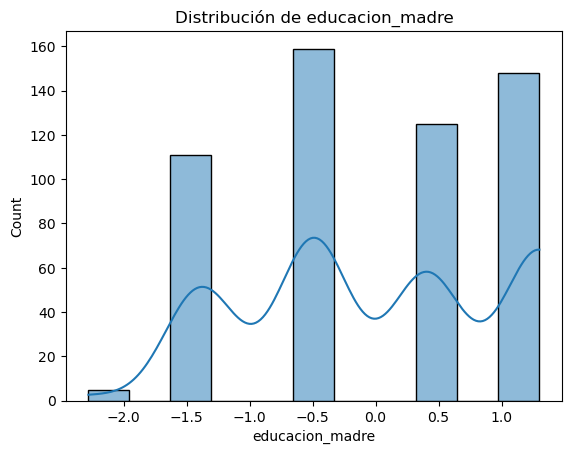

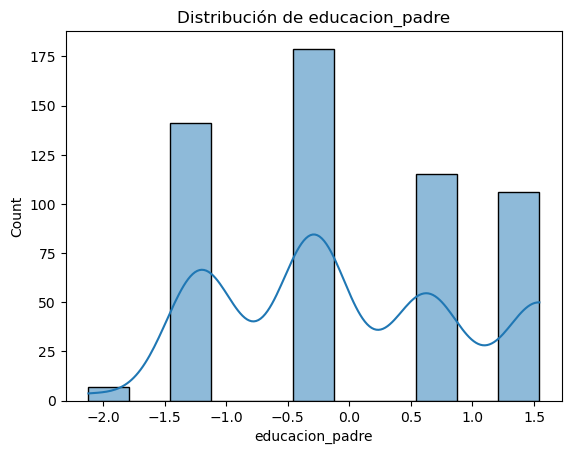

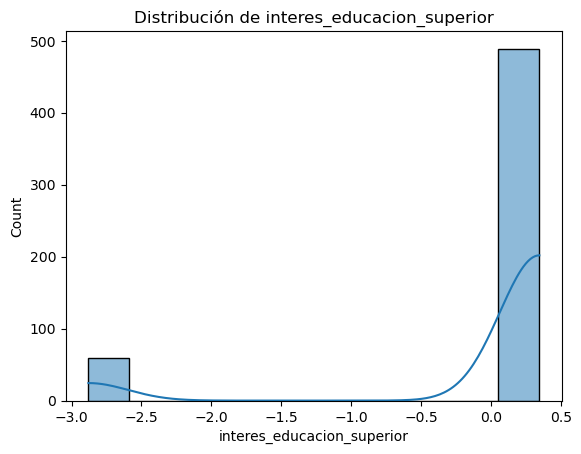

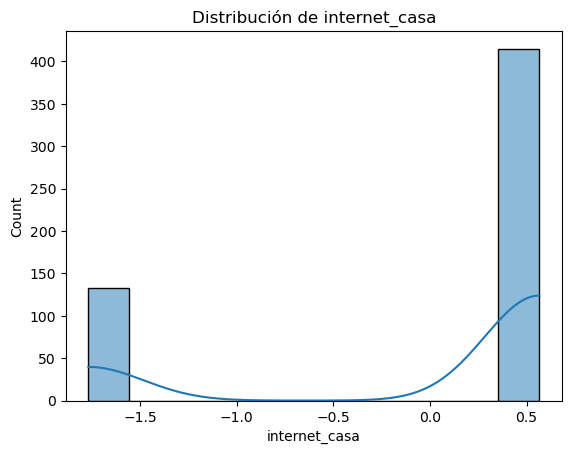

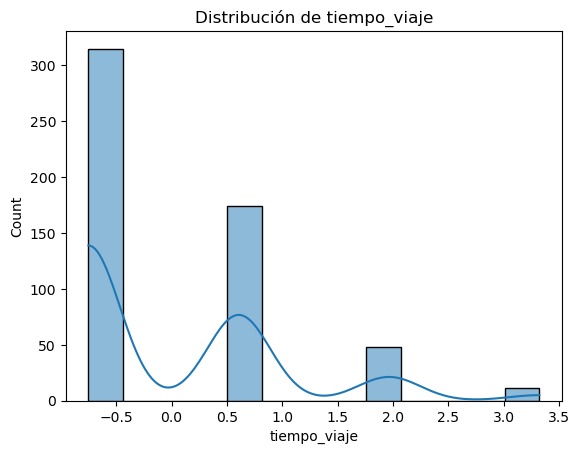

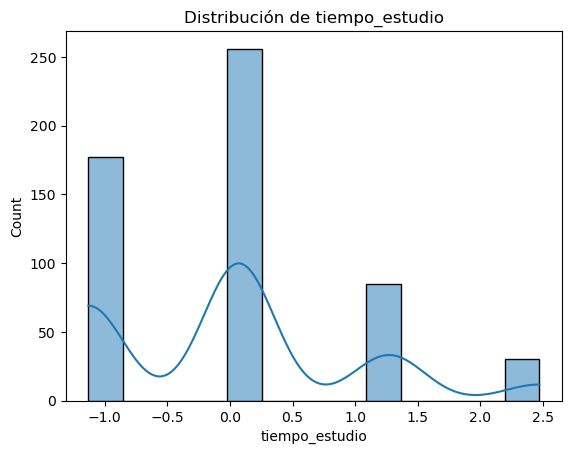

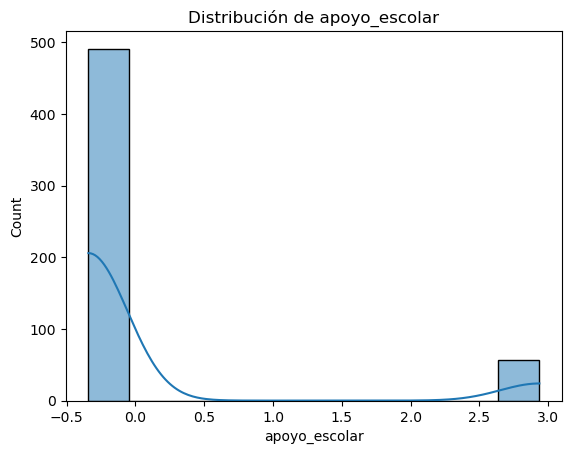

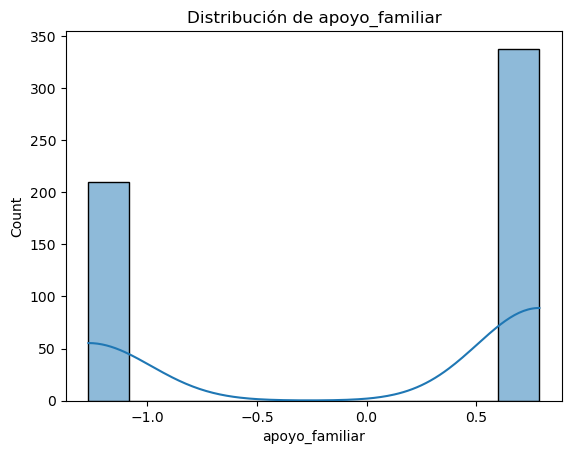

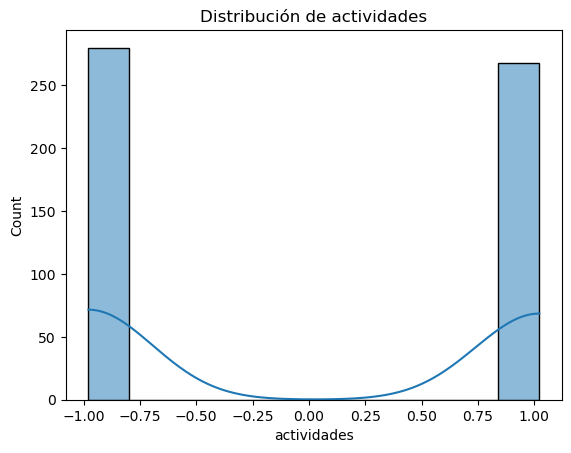

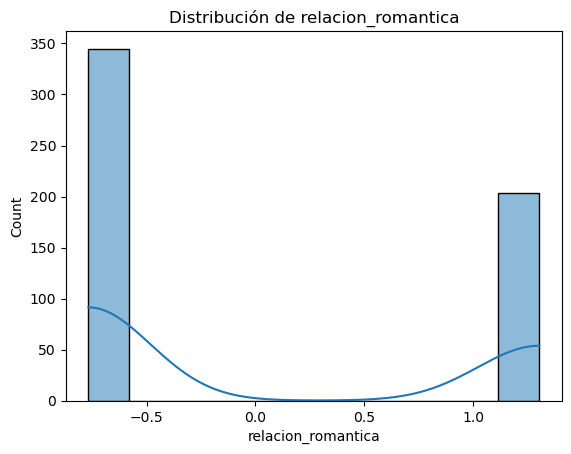

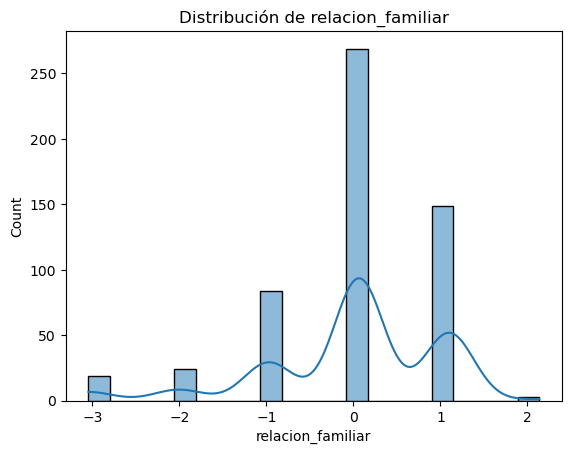

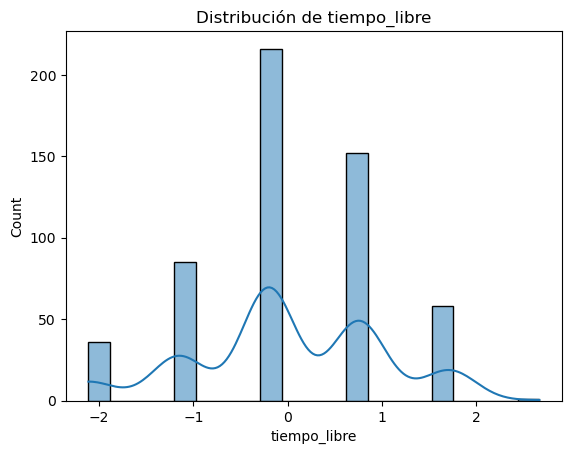

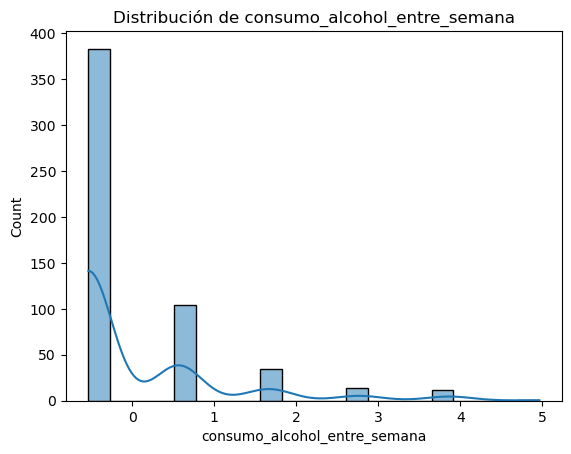

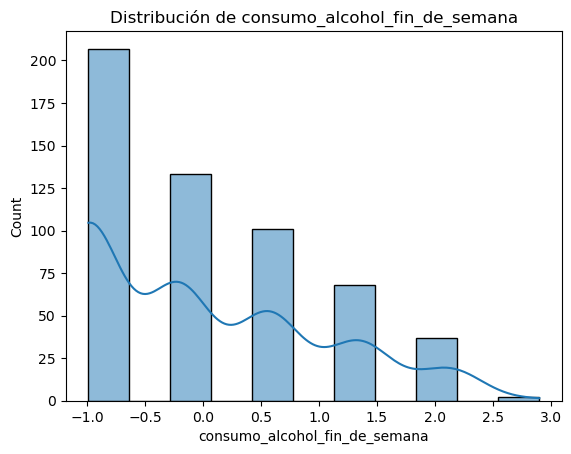

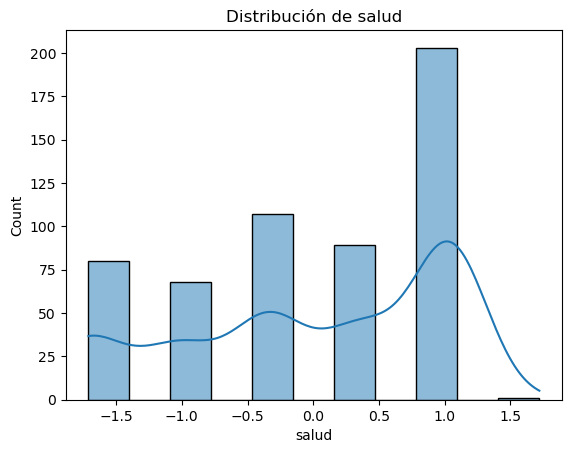

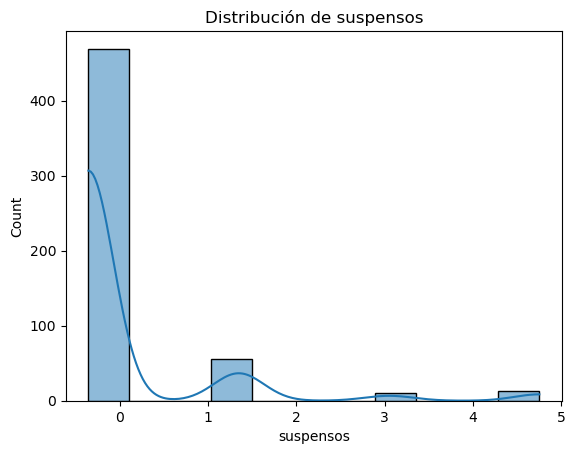

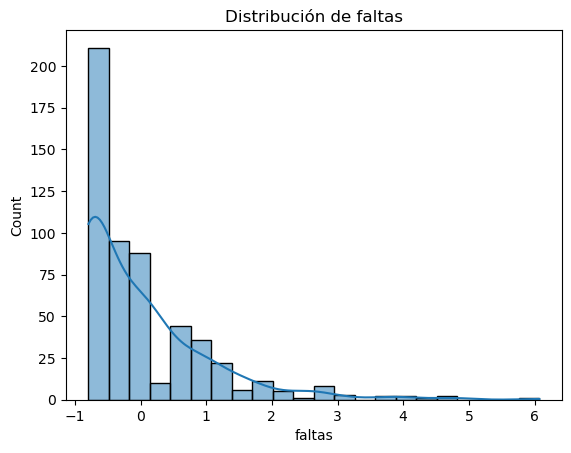

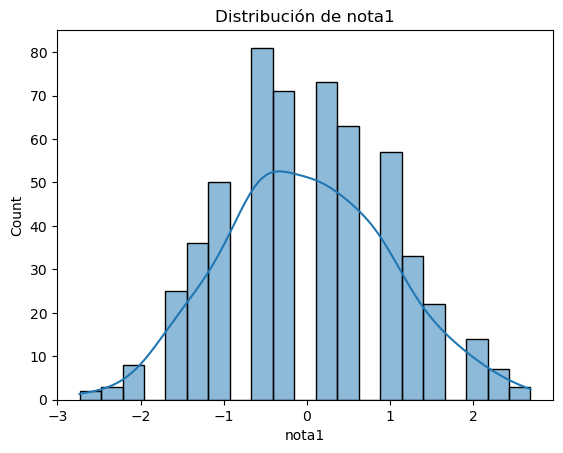

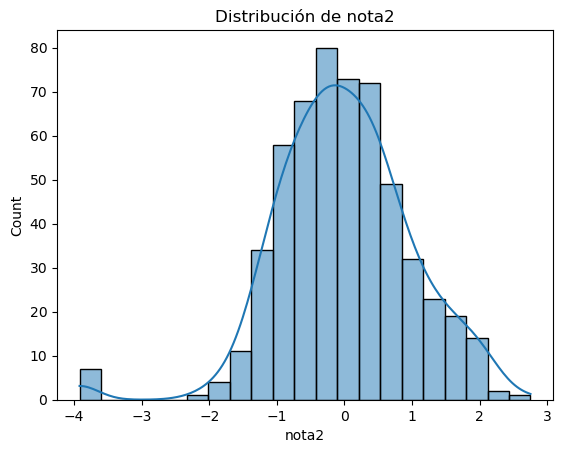

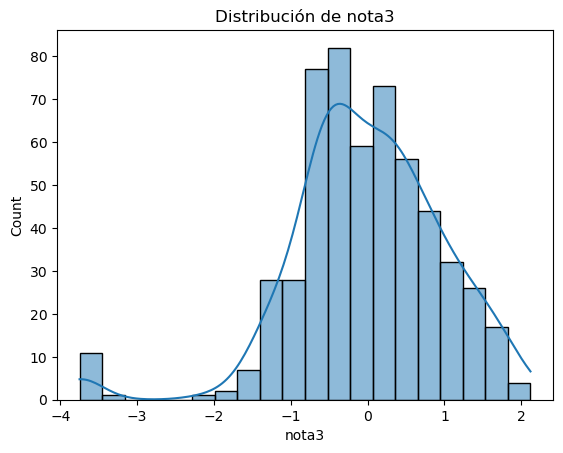

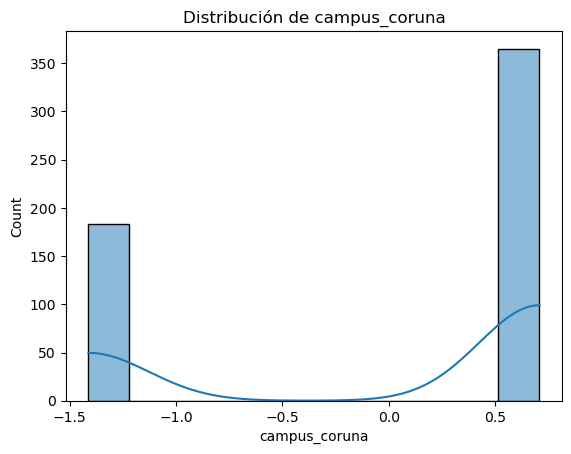

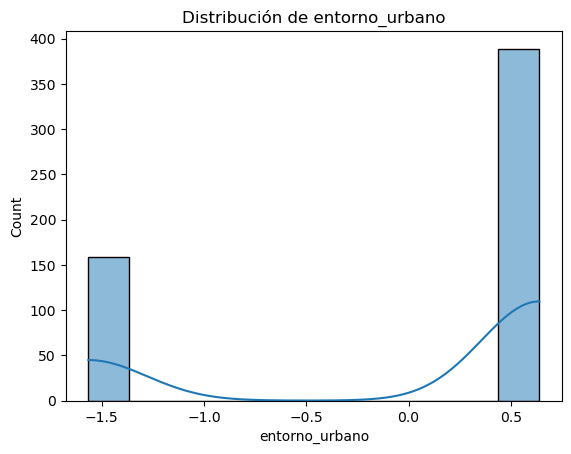

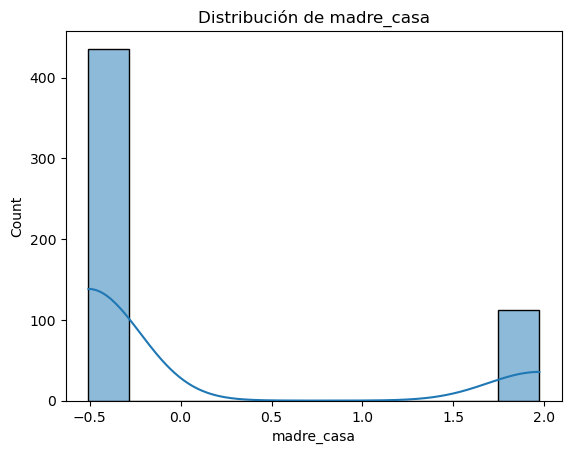

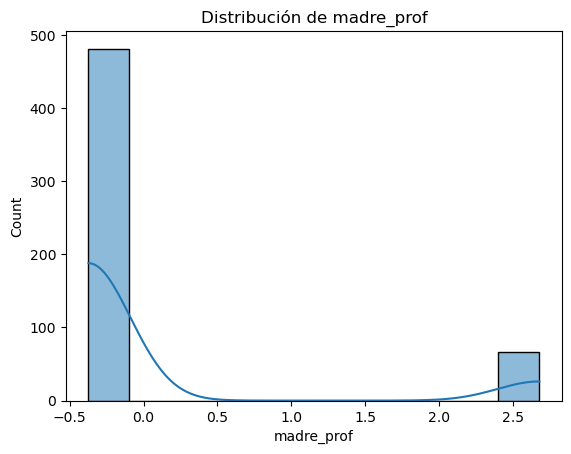

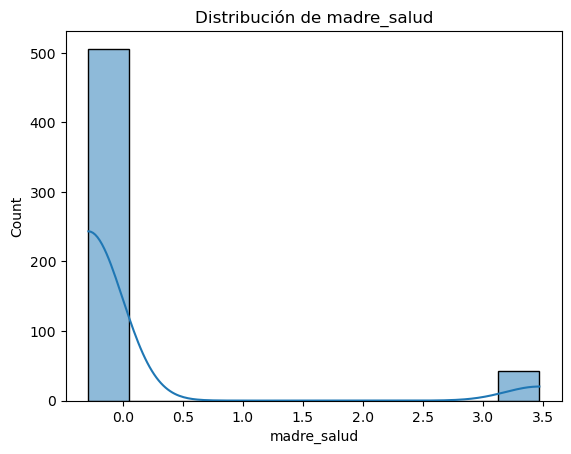

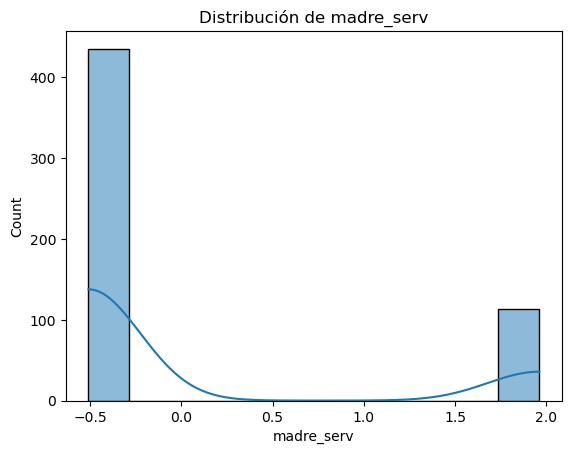

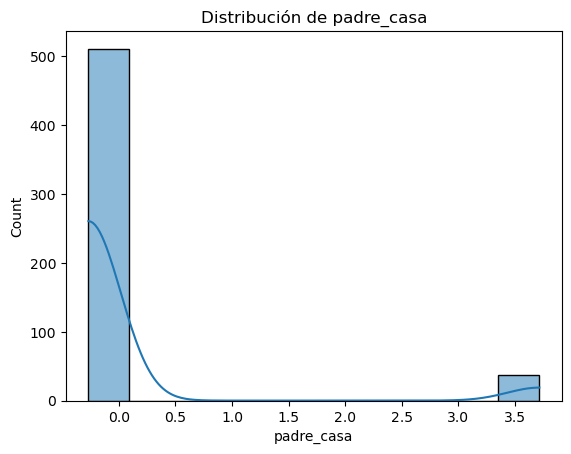

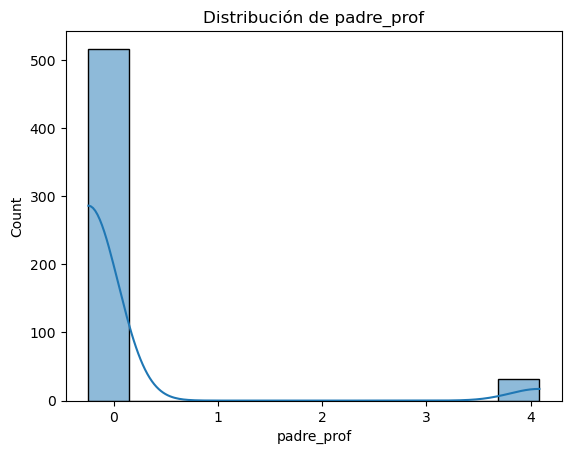

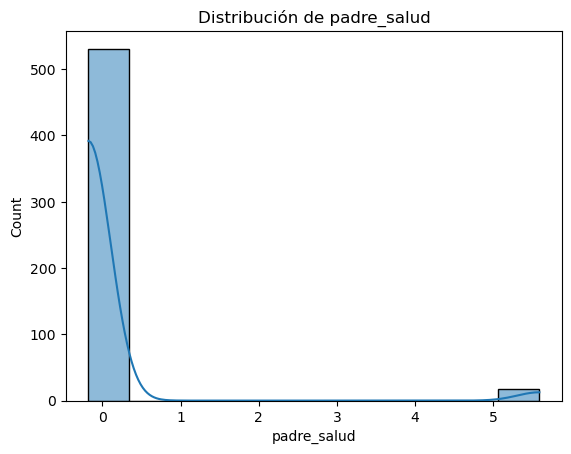

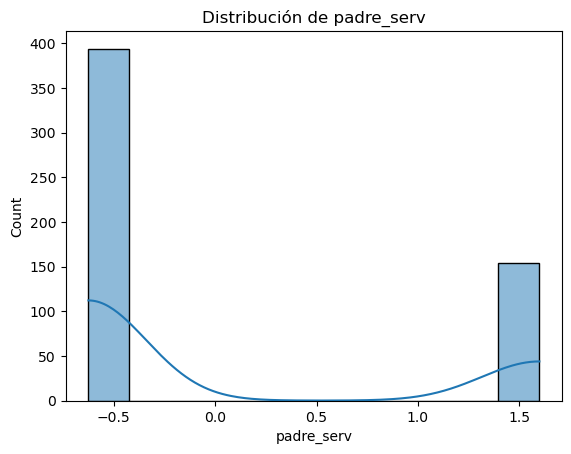

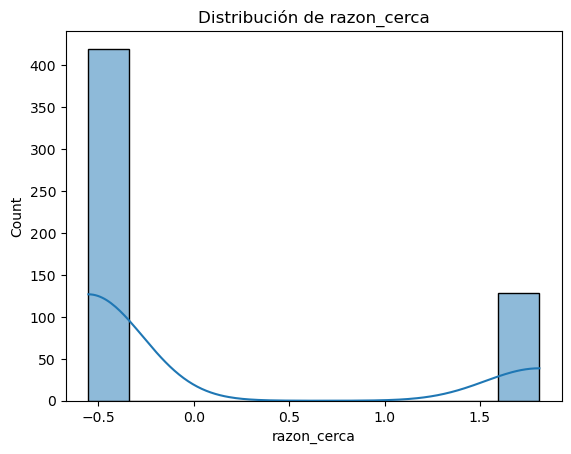

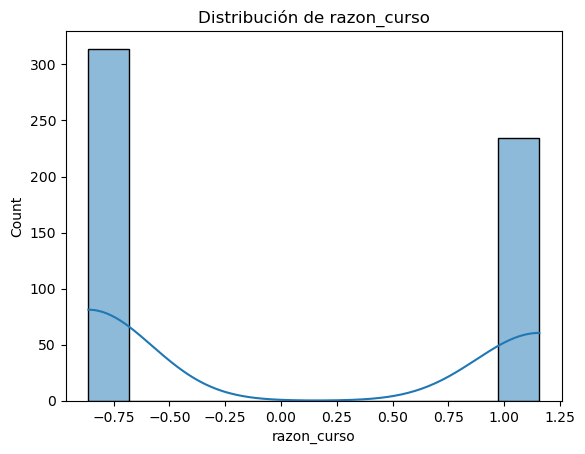

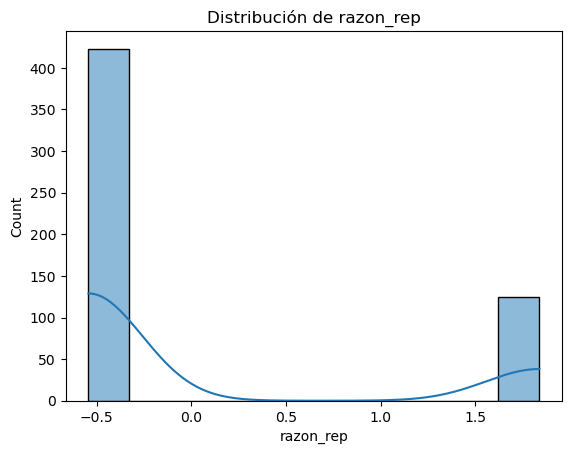

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


# Visualizar la distribución de las variables
for column in df.columns:
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribución de {column}')
    plt.show()

### Selección de variables según temática académica o personal

In [6]:
# Selección de variables de temática personal y académica
columnas_personales = ['sexo','edad', 'familia_numerosa', 'independizado_padres', 'educacion_madre', 'educacion_padre', 'internet_casa', 'apoyo_familiar', 'actividades', 'relacion_romantica', 'relacion_familiar', 'tiempo_libre', 'consumo_alcohol_entre_semana', 'consumo_alcohol_fin_de_semana', 'salud', 'entorno_urbano', 'madre_casa', 'madre_prof', 'madre_salud', 'madre_serv', 'padre_casa','padre_prof','padre_salud', 'padre_serv', 'tiempo_viaje']

columnas_academicas = ['interes_educacion_superior', 'tiempo_estudio', 'apoyo_escolar', 'suspensos', 'faltas', 'nota1', 'nota2','nota3', 'campus_coruna', 'razon_cerca', 'razon_curso', 'razon_rep' ]

In [7]:
# Creación de un nuevo DataFrame con las variables seleccionadas
df_personales = df[columnas_personales]
df_academicas = df[columnas_academicas]

In [8]:
# Visualizar los nuevos DataFrames
display(df_personales.head())
display(df_academicas.head())

,sexo,edad,familia_numerosa,independizado_padres,educacion_madre,educacion_padre,internet_casa,apoyo_familiar,actividades,relacion_romantica,...,entorno_urbano,madre_casa,madre_prof,madre_salud,madre_serv,padre_casa,padre_prof,padre_salud,padre_serv,tiempo_viaje
0,-1.189158,-1.424965,1.578115,0.376386,1.300376,0.628064,0.566111,0.788227,1.022143,-0.767076,...,0.639328,-0.506834,2.679385,-0.288104,-0.509676,-0.269086,-0.24487,-0.178928,1.599513,-0.750471
1,0.840931,0.963050,-0.633668,0.376386,-0.490091,-0.287306,0.566111,-1.268670,-0.978337,1.303652,...,-1.564142,-0.506834,-0.373220,-0.288104,1.962029,-0.269086,-0.24487,-0.178928,-0.625190,0.606817
2,-1.189158,0.167045,-0.633668,0.376386,0.405142,-0.287306,0.566111,0.788227,1.022143,-0.767076,...,0.639328,-0.506834,-0.373220,-0.288104,1.962029,-0.269086,-0.24487,-0.178928,1.599513,-0.750471
3,0.840931,0.963050,-0.633668,0.376386,1.300376,1.543434,0.566111,0.788227,1.022143,1.303652,...,0.639328,-0.506834,-0.373220,3.470968,-0.509676,-0.269086,-0.24487,5.588854,-0.625190,-0.750471
4,-1.189158,1.759054,-0.633668,0.376386,1.300376,-0.287306,0.566111,0.788227,1.022143,1.303652,...,0.639328,-0.506834,-0.373220,3.470968,-0.509676,-0.269086,-0.24487,-0.178928,-0.625190,0.606817


,interes_educacion_superior,tiempo_estudio,apoyo_escolar,suspensos,faltas,nota1,nota2,nota3,campus_coruna,razon_cerca,razon_curso,razon_rep
0,0.347353,1.270781,-0.340719,-0.357462,-0.793246,0.881372,0.750552,0.574941,0.708075,1.811422,-0.863263,-0.543607
1,0.347353,1.270781,-0.340719,-0.357462,0.279555,0.881372,0.750552,0.883830,-1.412280,1.811422,-0.863263,-0.543607
2,0.347353,-1.130557,-0.340719,4.752689,-0.364126,-1.287754,-1.250920,-1.587287,0.708075,-0.552052,1.158396,-0.543607
3,0.347353,0.070112,2.934968,1.345922,-0.364126,0.881372,0.083395,0.266051,0.708075,-0.552052,-0.863263,1.839565
4,0.347353,0.070112,-0.340719,-0.357462,1.137795,-0.203191,-0.583763,-0.660618,0.708075,-0.552052,1.158396,-0.543607


In [9]:
# Estadísticas descriptivas de las variables personales
display(df_personales.describe())

# Estadísticas descriptivas de las variables académicas
display(df_academicas.describe())

,sexo,edad,familia_numerosa,independizado_padres,educacion_madre,educacion_padre,internet_casa,apoyo_familiar,actividades,relacion_romantica,...,entorno_urbano,madre_casa,madre_prof,madre_salud,madre_serv,padre_casa,padre_prof,padre_salud,padre_serv,tiempo_viaje
count,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,...,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02
mean,-3.687237e-17,4.592839e-16,-7.131360e-17,-3.346877e-16,1.060587e-16,-2.431145e-16,1.555933e-16,1.448557e-16,6.402016e-17,1.175054e-16,...,-6.645131e-17,-5.024367e-17,2.030006e-16,-8.812902e-17,-2.305536e-16,4.457100e-17,-2.735038e-17,2.025954e-16,1.292559e-16,5.247222e-16
std,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,...,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00
min,-1.189158e+00,-1.424965e+00,-6.336675e-01,-2.656845e+00,-2.280559e+00,-2.118045e+00,-1.766437e+00,-1.268670e+00,-9.783368e-01,-7.670761e-01,...,-1.564142e+00,-5.068340e-01,-3.732200e-01,-2.881041e-01,-5.096765e-01,-2.690856e-01,-2.448700e-01,-1.789275e-01,-6.251903e-01,-7.504714e-01
25%,-1.189158e+00,-6.289600e-01,-6.336675e-01,3.763863e-01,-4.900914e-01,-1.202676e+00,5.661112e-01,-1.268670e+00,-9.783368e-01,-7.670761e-01,...,-1.564142e+00,-5.068340e-01,-3.732200e-01,-2.881041e-01,-5.096765e-01,-2.690856e-01,-2.448700e-01,-1.789275e-01,-6.251903e-01,-7.504714e-01
50%,8.409311e-01,1.670448e-01,-6.336675e-01,3.763863e-01,-4.900914e-01,-2.873058e-01,5.661112e-01,7.882270e-01,-9.783368e-01,-7.670761e-01,...,6.393281e-01,-5.068340e-01,-3.732200e-01,-2.881041e-01,-5.096765e-01,-2.690856e-01,-2.448700e-01,-1.789275e-01,-6.251903e-01,-7.504714e-01
75%,8.409311e-01,9.630496e-01,1.578115e+00,3.763863e-01,1.300376e+00,6.280639e-01,5.661112e-01,7.882270e-01,1.022143e+00,1.303652e+00,...,6.393281e-01,-5.068340e-01,-3.732200e-01,-2.881041e-01,-5.096765e-01,-2.690856e-01,-2.448700e-01,-1.789275e-01,1.599513e+00,6.068168e-01
max,8.409311e-01,4.147069e+00,1.578115e+00,3.763863e-01,1.300376e+00,1.543434e+00,5.661112e-01,7.882270e-01,1.022143e+00,1.303652e+00,...,6.393281e-01,1.973032e+00,2.679385e+00,3.470968e+00,1.962029e+00,3.716290e+00,4.083800e+00,5.588854e+00,1.599513e+00,3.321393e+00


,interes_educacion_superior,tiempo_estudio,apoyo_escolar,suspensos,faltas,nota1,nota2,nota3,campus_coruna,razon_cerca,razon_curso,razon_rep
count,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02,5.480000e+02
mean,-1.434376e-16,-2.325796e-16,-8.367192e-17,2.127252e-17,2.807973e-16,5.486285e-16,-6.580300e-16,1.863878e-17,-2.803921e-16,2.957893e-17,-5.794230e-17,-4.497619e-17
std,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00,1.000914e+00
min,-2.878912e+00,-1.130557e+00,-3.407193e-01,-3.574619e-01,-7.932460e-01,-2.733838e+00,-3.919549e+00,-3.749516e+00,-1.412280e+00,-5.520524e-01,-8.632630e-01,-5.436067e-01
25%,3.473534e-01,-1.130557e+00,-3.407193e-01,-3.574619e-01,-7.932460e-01,-5.647116e-01,-5.837626e-01,-6.606182e-01,-1.412280e+00,-5.520524e-01,-8.632630e-01,-5.436067e-01
50%,3.473534e-01,7.011208e-02,-3.407193e-01,-3.574619e-01,-3.641258e-01,-2.031906e-01,8.339465e-02,-4.283872e-02,7.080748e-01,-5.520524e-01,-8.632630e-01,-5.436067e-01
75%,3.473534e-01,7.011208e-02,-3.407193e-01,-3.574619e-01,4.941147e-01,5.198514e-01,7.505519e-01,5.749408e-01,7.080748e-01,-5.520524e-01,1.158396e+00,-5.436067e-01
max,3.473534e-01,2.471451e+00,2.934968e+00,4.752689e+00,6.072678e+00,2.688977e+00,2.752023e+00,2.119389e+00,7.080748e-01,1.811422e+00,1.158396e+00,1.839565e+00


### CSV con los nuevos dataframes

In [10]:
# CSV de las variables personales
df_personales.to_csv('DF4.1_proy_escuela_eda_clusterizacion_personales.csv', index=False)

# CSV de las variables académicas
df_academicas.to_csv('DF4.2_proy_escuela_eda_clusterizacion_academicas.csv', index=False)